# Query Pada Google Cloud Platform


select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`

limit 23940;

# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Malvin Subahri 

Batch : FTDS - 012

Dataset : h8dsft_P1M1_Malvin_Subahri.csv

Objective : Buat model Classification untuk memprediksi default_payment_next_month

Problem Statement : Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings ('ignore')

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load Dataset

pd.set_option("display.max.column", None)
data = pd.read_csv ('h8dsft_P1M1_Malvin_Subahri.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [4]:
# Menampilkan Head Dataset

data.head ()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [5]:
# Menampilkan Tail Dataset

data.tail ()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
# Check dataset

data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Tidak ditemukan missing values pada dataset

In [7]:
# Duplicate Dataset

data_copy = data.copy ()

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [8]:
# Mencari tahu tentang arti dari kolom sex

data['sex'].value_counts ()

2    1802
1    1163
Name: sex, dtype: int64

Index 1 = Male

Index 2 = Female

Terdapat 1163 pengguna male dan 1802 pengguna female

In [9]:
# Mencari tahu tentang arti dari kolom education_level 

data['education_level'].value_counts ()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

Terdapat 7 Education Level (0=unknown 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown )

Jika dilihat dari urutan angkanya, sangka tidak menunjukan semakin tinggi angka maka semakin tinggi jenjang pendidikan, maka angka ini merupakan tidak memiliki keterurutan atau bisa dibilang merupakan data categorical nominal

Paling banyak pengguna kartu kredit dilihat dari pendidikannya adalah university, graduate school, high school

Jika dilihat lagi education_level bisa kita bilang variabel yang berupa data categorical nominal karena berupa data tanpa keterurutannya bukan hasil dari perhitungan, namun pada preprocessing nanti education_level tetap akan kita klasifikasi sebagai data numerical

In [10]:
# Mencari tahu tentang arti dari kolom marital_status

data['marital_status'].value_counts ()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

Terdapat 4 status perkawinan (0=unknown 1=married, 2=single, 3=others)

Paling banyak pengguna kartu keredit adalah yang berstatus single

Jika dilihat lagi marital_status bisa kita bilang variabel yang berupa data categorical nominal karena berupa data tanpa keterurutannya bukan hasil dari perhitungan, namun pada preprocessing nanti marital_status tetap akan kita klasifikasi sebagai data numerical

In [11]:
# Mencari tahu rata - rata umur pengguna kartu kredit

data[['limit_balance','age']].describe ()

,limit_balance,age
count,2965.000000,2965.000000
mean,163369.308600,35.193255
std,125030.415472,9.109439
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,230000.000000,41.000000
max,800000.000000,69.000000


Rata - rata limit balance kartu kredit adalah 163000, dengan limit balance paling kecil adalah 10000, dan limit balance paling besar adalah 800000

Rata - rata umur pengguna kartu kredit berumur 35 tahun, pengguna kartu kredit termuda berumur 21 tahun, dan pengguna kartu kredit tertua berumur 69 tahun

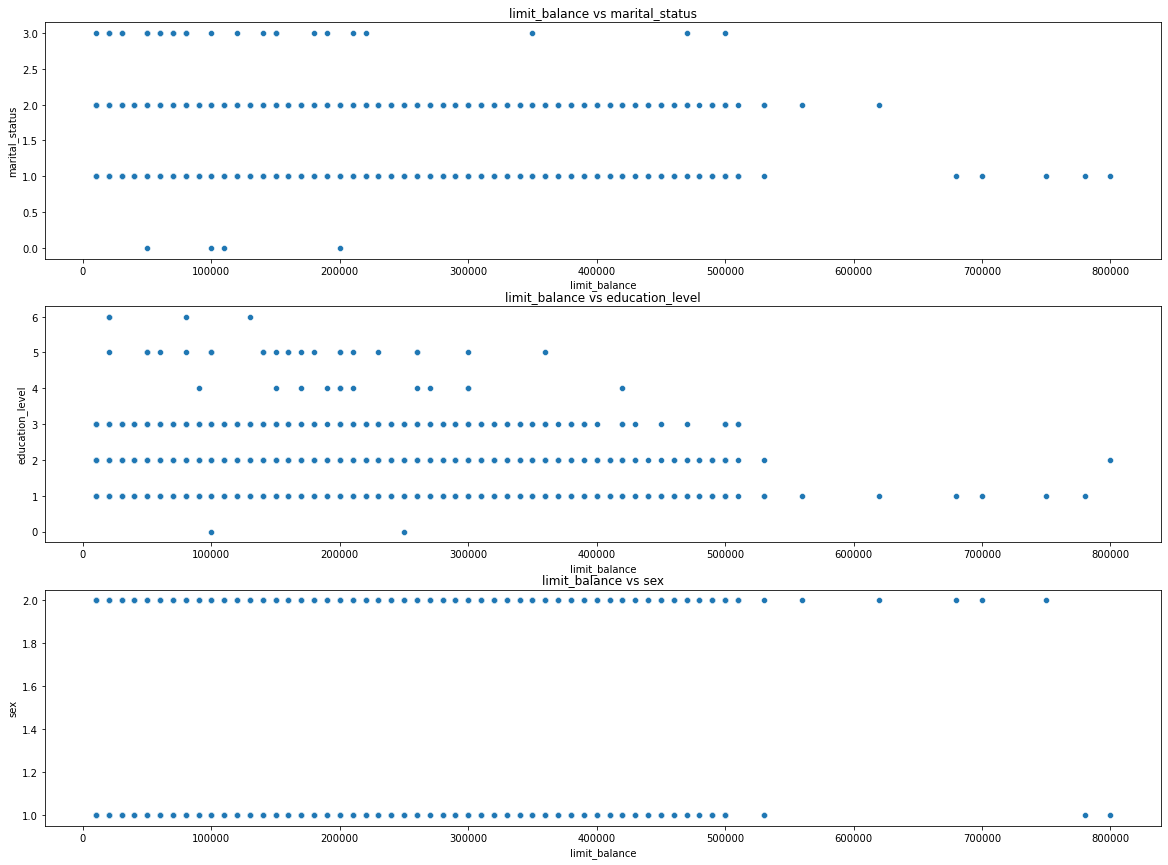

In [12]:
plt.figure(figsize = (20, 20))

# Mencari korelasi kolom 'limit_balance' dengan kolom 'marital_status'

plt.subplot(4, 1, 1)
sns.scatterplot(x = 'limit_balance', y = 'marital_status', data = data)
plt.title('limit_balance vs marital_status')

# Mencari korelasi kolom 'limit_balance' dengan kolom 'education_level'

plt.subplot(4, 1, 2)
sns.scatterplot(x = 'limit_balance', y = 'education_level', data = data)
plt.title('limit_balance vs education_level')

# Mencari korelasi kolom 'limit_balance' dengan kolom 'sex'

plt.subplot(4, 1, 3)
sns.scatterplot(x = 'limit_balance', y = 'sex', data = data)
plt.title('limit_balance vs sex')

plt.show()

`Korelasi Kolom 'limit_balance' dengan kolom 'marital_status'`

Ternyata orang yang berstatus married / sudah berkeluarga memiliki limit balance yang lebih besar dibandingkan dengan orang yang berstatus single / belum berkeluarga , dari sini kita bisa tahu bahwa status mempengaruhi limit balance kartu kredit

`Korelasi Kolom 'limit_balance' dengan kolom 'education_level'`

Jika kita lihat semakin jelas pendidikan seseorang, maka semakin besar limit balance yang diberikan, dapat orang dari grafik limit balance yang diberikan untuk orang dengan pendidikan graduate school, university, dan high school lebih besar dibandingkan orang dengan pendidikan yang others & unknown 

`Korelasi Kolom 'limit_balance' dengan kolom 'sex'`

Jika kita lihat limit balance yang diberikan kepada Male lebih besar dibandingkan limit balance yang diberikan kepada Female

Rata - Rata Limit Balance Yang Diberikan Berdasarkan Sex sex
1    158925.193465
2    166237.513873
Name: limit_balance, dtype: float64


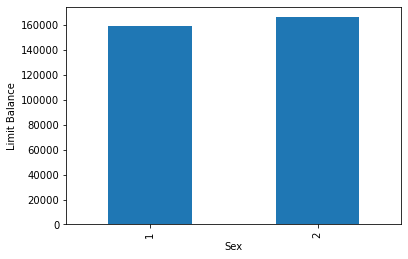

In [13]:
data.groupby(data['sex']).mean()['limit_balance'].plot(kind='bar')
plt.title('')
plt.xlabel('Sex')
plt.ylabel('Limit Balance')
print('Rata - Rata Limit Balance Yang Diberikan Berdasarkan Sex', data.groupby(data['sex']).mean()['limit_balance'])

Index 1 = Male

Index 2 = Female

Jika dilihat dari grafik, rata - rata limit balance yang diberikan kepada Female lebih besar dibandingkan rata - rata limit balance yang diberikan kepada Male

In [14]:
# Mencari tahu arti dari kolom pay_0

data['pay_0'].value_counts ()

 0.0    1516
-1.0     540
 1.0     356
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64

Karena pada query didescribsikan pay, bill_amt, pay_amt mengindentifikasi semakin kecil nilai yang tertera pada kolom, maka bulannya semakin besar

Contoh pay_0 adalah status pembayaran bulan September, pay_2 adalah status pembayaran bulan Agustus

Angka menunjukan bahwa pembayaran telat dalam bulan, maka yang nilainya > 0 dapat dibilang mereka telat bayar

Pada bulan September, mayoritas pengguna kartu kredit tidak telat melakukan pembayaran

<AxesSubplot:>

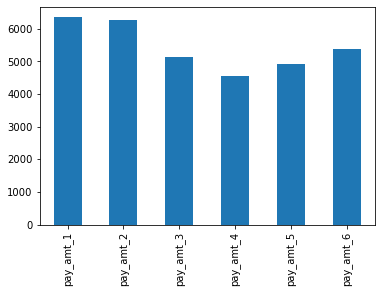

In [15]:
# Mencari tahu arti dari kolom pay_amt

data[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']].mean().plot (kind = 'bar')

Rata - rata jumlah yang dibayarkan per bulan

`pay_amt_1` adalah rata - rata jumlah yang dibayarkan di bulan September

`pay_amt_2` adalah rata - rata jumlah yang dibayarkan di bulan Agustus

Semakin besar nilai pay_amt, maka semakin kecil nilai bulan

<AxesSubplot:ylabel='default_payment_next_month'>

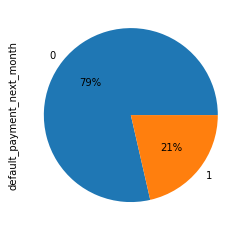

In [16]:
# Mencari Tahu Apakah Data Imbalance Atau Tidak

data['default_payment_next_month'].value_counts ().plot (kind = 'pie', autopct='%1.0f%%')

Jika Dilihat Dari `default_payment_next_month` Dapat Diketahui Bahwa Dataset Kita Imbalance Karena Perbandingannya Data 0 > 5x Dari Data 1 Atau Jika Dilihat Dari Data Keseluruhan Perbandingan Data 0 : Data 1 = 79% : 21%

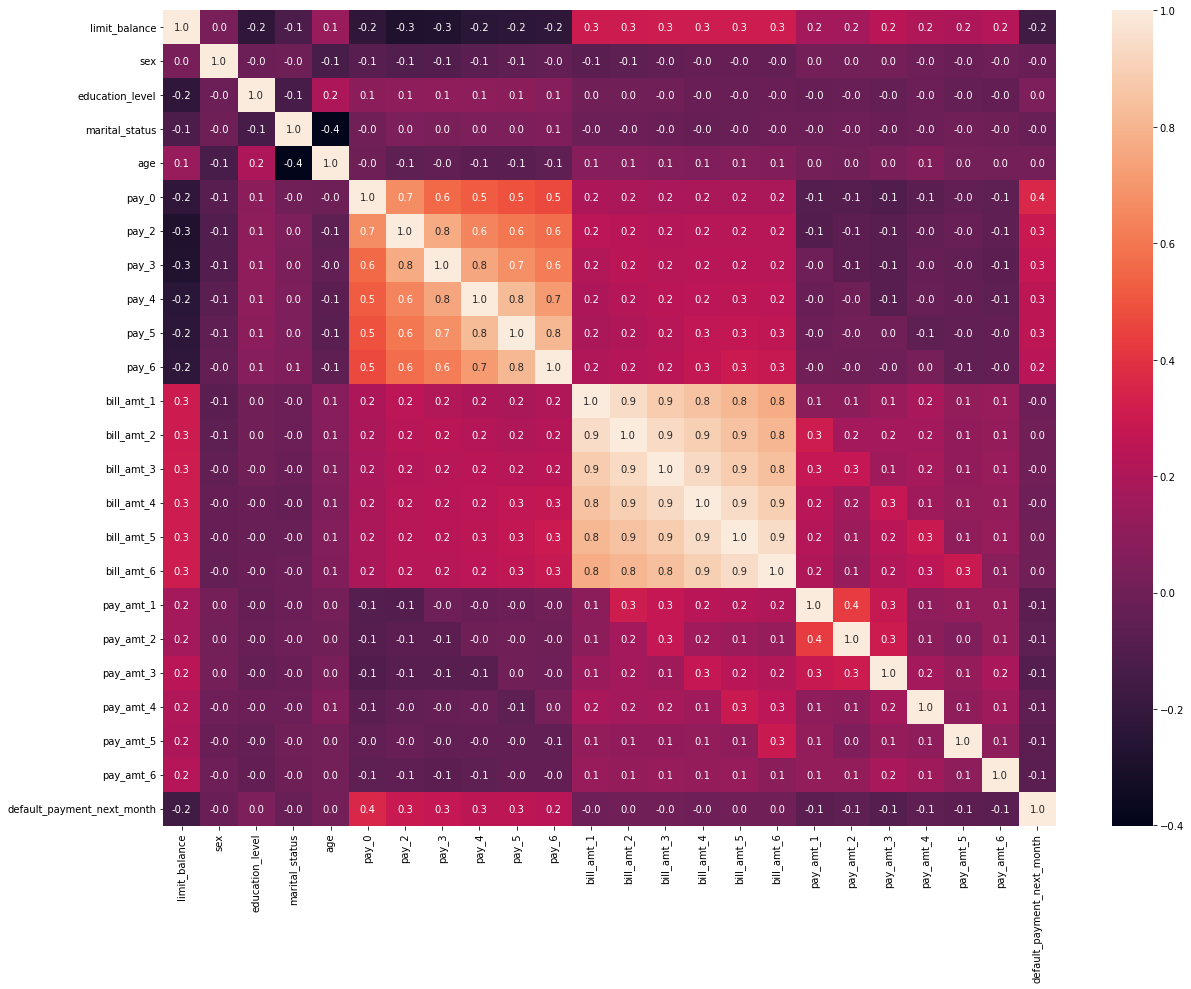

In [17]:
# Mencari korelasi kolom default_payment_next_month dengan heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr (), annot = True, fmt = '.1f')
plt.show()

Dari heatmap yang memiliki korelasi dengan default_payment_next_month adalah `limit balance, pay_0 - pay_6, pay_amt_1 - pay_amt_6`

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Get Data For Model Inference

In [18]:
# Get Data For Model Inference

data_inf = data.sample (10, random_state = 21)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
136,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,0,178262.0,177644.0,171997.0,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1490,20000.0,2,1,2,25.0,0.0,0.0,0.0,-1.0,-1,-2,17693.0,13037.0,600.0,1040.0,0.0,0.0,1081.0,600.0,1040.0,800.0,0.0,0.0,0
991,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,2,20234.0,20476.0,21991.0,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
1436,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3,2,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1
2003,260000.0,1,1,1,41.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0
2400,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,-1,2116.0,0.0,9781.0,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
2707,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
1505,20000.0,1,2,2,37.0,0.0,0.0,0.0,-2.0,-1,0,7440.0,15960.0,0.0,-1953.0,5985.0,6893.0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0,0
1130,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,0,47695.0,49550.0,51636.0,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
1528,150000.0,2,3,2,52.0,0.0,0.0,-1.0,-1.0,-1,-1,5678.0,3608.0,694.0,-6.0,2266.0,1601.0,1010.0,696.0,0.0,2272.0,1605.0,3027.0,0


In [19]:
# Remove Inference - Set from Dataset

data_train_test = data.drop (data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [20]:
# Reset Index

data_train_test.reset_index (drop = True, inplace = True)
data_inf.reset_index (drop = True, inplace = True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,0,178262.0,177644.0,171997.0,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1,20000.0,2,1,2,25.0,0.0,0.0,0.0,-1.0,-1,-2,17693.0,13037.0,600.0,1040.0,0.0,0.0,1081.0,600.0,1040.0,800.0,0.0,0.0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,2,20234.0,20476.0,21991.0,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
3,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3,2,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1
4,260000.0,1,1,1,41.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,-1,2116.0,0.0,9781.0,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
7,20000.0,1,2,2,37.0,0.0,0.0,0.0,-2.0,-1,0,7440.0,15960.0,0.0,-1953.0,5985.0,6893.0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,0,47695.0,49550.0,51636.0,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
9,150000.0,2,3,2,52.0,0.0,0.0,-1.0,-1.0,-1,-1,5678.0,3608.0,694.0,-6.0,2266.0,1601.0,1010.0,696.0,0.0,2272.0,1605.0,3027.0,0


## Feature Selection

In [21]:
# Display data_train_test

data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2951,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2952,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2953,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Berdasarkan hasil EDA jika dilihat dari heatmap kolom yang memiliki korelasi dengan `default_payment_next_month` adalah `limit_balance, pay_0 - pay_6, pay_amt_1 - pay_amt_6`, 

Berdasarkan personal judgement, kolom `marital_status` dan `education_level` memiliki pengaruh terhadap limit balance yang diberikan oleh karena itu kita memilih kolo tersebut ke dalam Feature Selection


## Splitting Dataset

In [22]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test[['limit_balance', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                     'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
y = data_train_test[['default_payment_next_month']]
X

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,2,0.0,0.0,0.0,0.0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,1,2,0.0,0.0,0.0,0.0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,2,0.0,0.0,0.0,2.0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,0.0,0.0,0.0,0.0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,2,0.0,0.0,0.0,0.0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,1,-1.0,-1.0,-1.0,-1.0,-2,-1,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,1,1,2.0,-1.0,-1.0,-1.0,-2,-1,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,2,1.0,-1.0,-1.0,-1.0,-2,-2,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,2,1,1.0,-1.0,-1.0,-2.0,-2,-1,2920.0,0.0,0.0,0.0,6753.0,0.0


In [23]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2364, 15)
Test Size :  (591, 15)


## Handling Outliers 

In [24]:
# Check Data Distribution From Skewness

print ('Skewness : ', X_train['limit_balance'].skew ())
print ('Skewness : ', X_train['education_level'].skew ())
print ('Skewness : ', X_train['marital_status'].skew ())
print ('Skewness : ', X_train['pay_0'].skew ())
print ('Skewness : ', X_train['pay_2'].skew ())
print ('Skewness : ', X_train['pay_3'].skew ())
print ('Skewness : ', X_train['pay_4'].skew ())
print ('Skewness : ', X_train['pay_5'].skew ())
print ('Skewness : ', X_train['pay_6'].skew ())
print ('Skewness : ', X_train['pay_amt_1'].skew ())
print ('Skewness : ', X_train['pay_amt_2'].skew ())
print ('Skewness : ', X_train['pay_amt_3'].skew ())
print ('Skewness : ', X_train['pay_amt_4'].skew ())
print ('Skewness : ', X_train['pay_amt_5'].skew ())
print ('Skewness : ', X_train['pay_amt_6'].skew ())


Skewness :  0.9856439193313401
Skewness :  0.9280632710753752
Skewness :  0.0063448154483790355
Skewness :  1.0480446651440884
Skewness :  0.9055864882561273
Skewness :  0.8888592807330786
Skewness :  0.9347296911332932
Skewness :  0.8766091975182072
Skewness :  0.8096867575380643
Skewness :  12.018671054915693
Skewness :  27.314789577462076
Skewness :  8.23769507037083
Skewness :  8.381845910496015
Skewness :  11.8840979855246
Skewness :  7.391224621910585


Jika Dilihat Semua Distribusi Datanya normal Kecuali `marital_status`  Karena Skewnessnya Berada di rentang -0.5 - 0.5

Kolom `limit_balance, education_level, pay_2, pay_3, pay_4, pay_5, pay_6` distribusi datanya non-ekstrim skew karena skewnessnya berada di rentang 0.5 - 1

Dan kolom `pay_0, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6` distribusi datanya ekstrim skew karena skewnessnya > 1

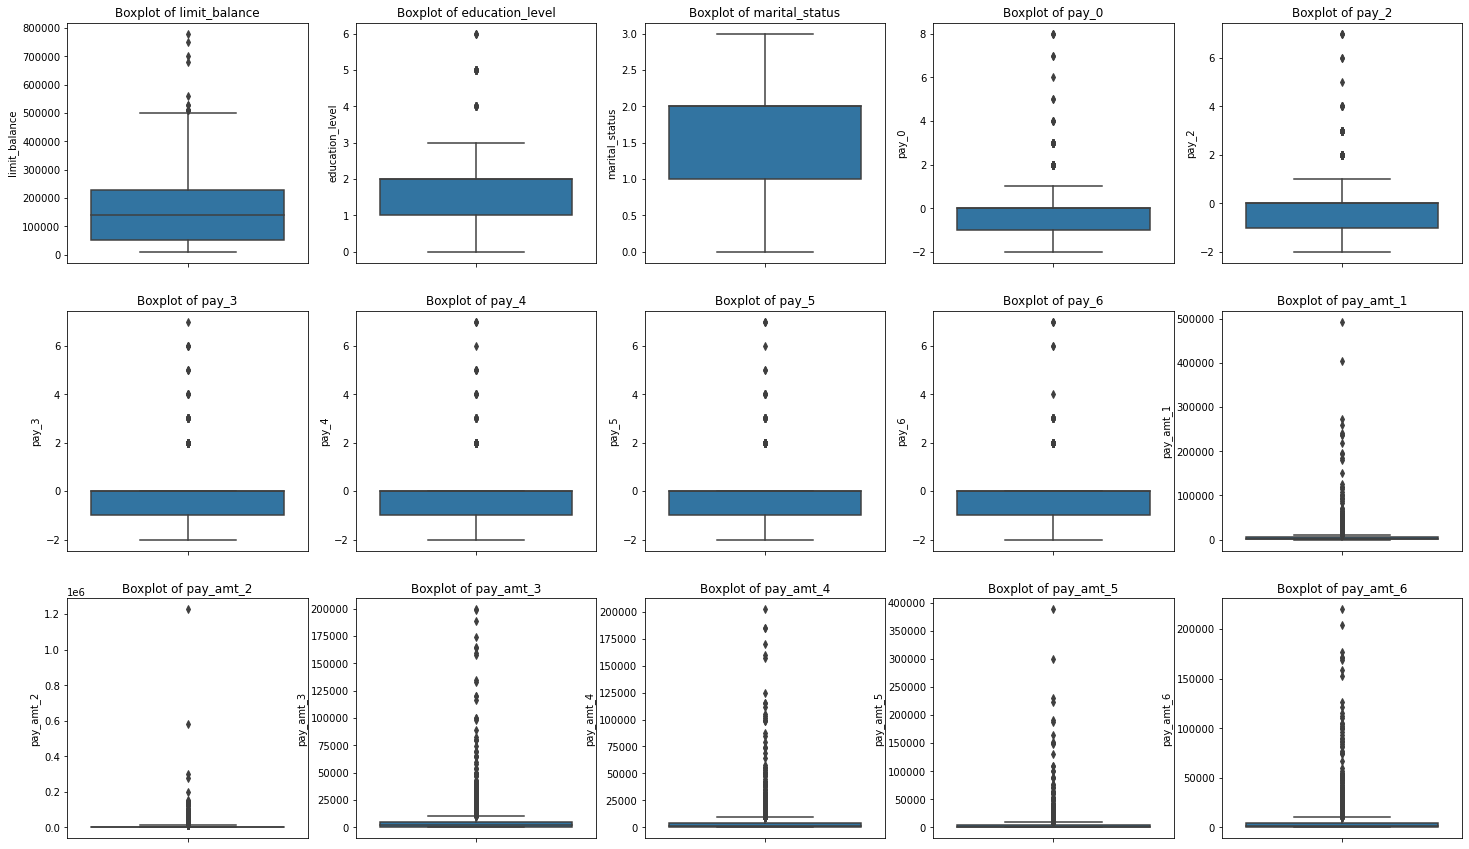

In [25]:
# Cek outliers menggunakan boxplot

plt.figure(figsize = (25, 15))

plt.subplot(3, 5, 1)
sns.boxplot(y = X_train['limit_balance'])
plt.title('Boxplot of limit_balance')

plt.subplot(3, 5, 2)
sns.boxplot(y = X_train['education_level'])
plt.title('Boxplot of education_level')

plt.subplot(3, 5, 3)
sns.boxplot(y = X_train['marital_status'])
plt.title('Boxplot of marital_status')

plt.subplot(3, 5, 4)
sns.boxplot(y = X_train['pay_0'])
plt.title('Boxplot of pay_0')

plt.subplot(3, 5, 5)
sns.boxplot(y = X_train['pay_2'])
plt.title('Boxplot of pay_2')

plt.subplot(3, 5, 6)
sns.boxplot(y = X_train['pay_3'])
plt.title('Boxplot of pay_3')

plt.subplot(3, 5, 7)
sns.boxplot(y = X_train['pay_4'])
plt.title('Boxplot of pay_4')

plt.subplot(3, 5, 8)
sns.boxplot(y = X_train['pay_5'])
plt.title('Boxplot of pay_5')

plt.subplot(3, 5, 9)
sns.boxplot(y = X_train['pay_6'])
plt.title('Boxplot of pay_6')

plt.subplot(3, 5, 10)
sns.boxplot(y = X_train['pay_amt_1'])
plt.title('Boxplot of pay_amt_1')

plt.subplot(3, 5, 11)
sns.boxplot(y = X_train['pay_amt_2'])
plt.title('Boxplot of pay_amt_2')

plt.subplot(3, 5, 12)
sns.boxplot(y = X_train['pay_amt_3'])
plt.title('Boxplot of pay_amt_3')

plt.subplot(3, 5, 13)
sns.boxplot(y = X_train['pay_amt_4'])
plt.title('Boxplot of pay_amt_4')

plt.subplot(3, 5, 14)
sns.boxplot(y = X_train['pay_amt_5'])
plt.title('Boxplot of pay_amt_5')

plt.subplot(3, 5, 15)
sns.boxplot(y = X_train['pay_amt_6'])
plt.title('Boxplot of pay_amt_6')

plt.show ()

Terdapat Outliers Pada tiap kolom kecuali kolom `marital_status`, oleh karena itu `marital _status` tidak perlu dihandling outliers

### Handling Outliers Menggunakan Teknik Capping Dengan Windsorizer

In [26]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                         tail='right', # cap left, right or both tails 
                         fold=1.5, # fold 1.5 because skew (skewness > 0.5)
                         variables=['limit_balance', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                                    'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

windsoriser.fit(X_train)

X_train_cap = windsoriser.transform(X_train)

In [27]:
# Check Dataset Before & After Capping

print('Boston Dataframe - Before Capping')
print(X_train.describe())
print('')
print('Boston Dataframe - After Capping')
print(X_train_cap.describe())

Boston Dataframe - Before Capping
       limit_balance  education_level  marital_status        pay_0  \
count    2364.000000      2364.000000     2364.000000  2364.000000   
mean   162990.693739         1.847293        1.553299     0.005922   
std    123893.931324         0.784389        0.524590     1.118822   
min     10000.000000         0.000000        0.000000    -2.000000   
25%     50000.000000         1.000000        1.000000    -1.000000   
50%    140000.000000         2.000000        2.000000     0.000000   
75%    230000.000000         2.000000        2.000000     0.000000   
max    780000.000000         6.000000        3.000000     8.000000   

             pay_2        pay_3        pay_4        pay_5        pay_6  \
count  2364.000000  2364.000000  2364.000000  2364.000000  2364.000000   
mean     -0.112521    -0.140863    -0.188663    -0.229272    -0.253384   
std       1.187477     1.167353     1.147567     1.130827     1.153336   
min      -2.000000    -2.000000    -2.0

Terdapat perbedaan mean, standar deviasi, max setelah dilakukan capping

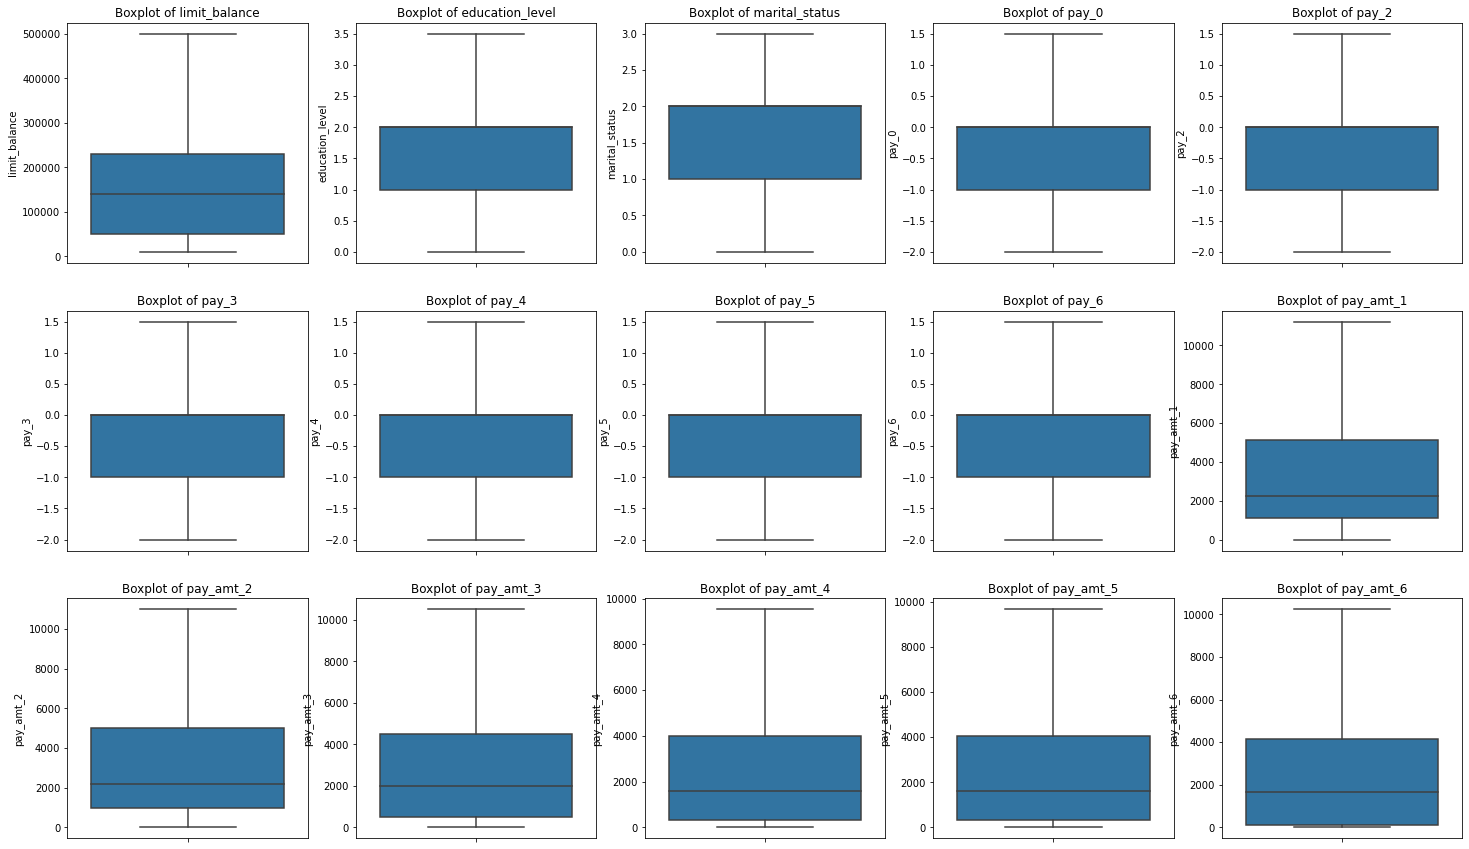

In [28]:
# Cek outliers menggunakan boxplot setelah melakukan capping

plt.figure(figsize = (25, 15))

plt.subplot(3, 5, 1)
sns.boxplot(y = X_train_cap['limit_balance'])
plt.title('Boxplot of limit_balance')

plt.subplot(3, 5, 2)
sns.boxplot(y = X_train_cap['education_level'])
plt.title('Boxplot of education_level')

plt.subplot(3, 5, 3)
sns.boxplot(y = X_train_cap['marital_status'])
plt.title('Boxplot of marital_status')

plt.subplot(3, 5, 4)
sns.boxplot(y = X_train_cap['pay_0'])
plt.title('Boxplot of pay_0')

plt.subplot(3, 5, 5)
sns.boxplot(y = X_train_cap['pay_2'])
plt.title('Boxplot of pay_2')

plt.subplot(3, 5, 6)
sns.boxplot(y = X_train_cap['pay_3'])
plt.title('Boxplot of pay_3')

plt.subplot(3, 5, 7)
sns.boxplot(y = X_train_cap['pay_4'])
plt.title('Boxplot of pay_4')

plt.subplot(3, 5, 8)
sns.boxplot(y = X_train_cap['pay_5'])
plt.title('Boxplot of pay_5')

plt.subplot(3, 5, 9)
sns.boxplot(y = X_train_cap['pay_6'])
plt.title('Boxplot of pay_6')

plt.subplot(3, 5, 10)
sns.boxplot(y = X_train_cap['pay_amt_1'])
plt.title('Boxplot of pay_amt_1')

plt.subplot(3, 5, 11)
sns.boxplot(y = X_train_cap['pay_amt_2'])
plt.title('Boxplot of pay_amt_2')

plt.subplot(3, 5, 12)
sns.boxplot(y = X_train_cap['pay_amt_3'])
plt.title('Boxplot of pay_amt_3')

plt.subplot(3, 5, 13)
sns.boxplot(y = X_train_cap['pay_amt_4'])
plt.title('Boxplot of pay_amt_4')

plt.subplot(3, 5, 14)
sns.boxplot(y = X_train_cap['pay_amt_5'])
plt.title('Boxplot of pay_amt_5')

plt.subplot(3, 5, 15)
sns.boxplot(y = X_train_cap['pay_amt_6'])
plt.title('Boxplot of pay_amt_6')

plt.show ()

Hasil boxplot setelah melakukan capping

## Handling Missing Values

In [29]:
# Cek Missing Values Pada X_train

X_train.isnull (). sum ()

limit_balance      0
education_level    0
marital_status     0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [30]:
# Cek Missing Values Pada X_train

X_test.isnull (). sum ()

limit_balance      0
education_level    0
marital_status     0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [31]:
# Cek Missing Values Pada X_train

y_train.isnull (). sum ()

default_payment_next_month    0
dtype: int64

In [32]:
# Cek Missing Values Pada X_train

y_test.isnull (). sum ()

default_payment_next_month    0
dtype: int64

Tidak Ditemukan Missing Values Pada X_train, X_test, y_train, y_test

## Split between Numerical Columns and Categorical Columns

In [33]:
# Get Numerical Columns and Categorical Columns

num_columns= X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


In [34]:
# Split Train-Set and Test-Set based on Column Type

X_train_num_cap_skew = X_train_cap[['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_train_num_cap_normal = X_train_cap[['marital_status']]
X_train_cat_cap = X_train_cap[cat_columns]

# X_train_num_skew = X_train[['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
# X_train_num_normal = X_train[['marital_status']]
# X_train_cat = X_train[cat_columns]

X_test_num_skew = X_test[['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_test_num_normal = X_test[['marital_status']]
X_test_cat = X_test[cat_columns]

## Feature Scaling

Karena kolom `limit_balance, education_level, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6` merupakan data yang terdistribusi secara skew, maka untuk Feature Scaling kita menggunakan `MinMaxScaler`

Karena kolom `marital_status` merupakan data yang terdistribusi secara normal, maka untuk Feature Scaling kita menggunakan `StandardScaler`

In [35]:
# Feature Scaling using MinMaxScaler

scaler_mms = MinMaxScaler()
scaler_mms.fit(X_train_num_cap_skew)

X_train_num_scaled_skew = scaler_mms.transform(X_train_num_cap_skew)
X_test_num_scaled_skew = scaler_mms.transform(X_test_num_skew)


In [36]:
# Feature Scaling using StandardScaler

scaler_ss = StandardScaler()
scaler_ss.fit(X_train_num_cap_normal)

X_train_num_scaled_normal = scaler_ss.transform(X_train_num_cap_normal)
X_test_num_scaled_normal = scaler_ss.transform(X_test_num_normal)

## Feature Encoding

In [37]:
# Display X_train_cat 

X_train_cat_cap

""
1271
2445
1444
590
2611
...
2304
968
1667
1688


Karena Kita Tidak Ada Kolom Categorical Di X_train_cap, Maka Tidak Dilakukan Feature Encoding

In [38]:
# Display y_train

y_train

,default_payment_next_month
1271,0
2445,0
1444,0
590,0
2611,0
...,...
2304,0
968,0
1667,0
1688,1


Karena kolom y_train sudah berbentuk numeric maka tidak perlu dilakukan encoding

## Concate between Numerical Columns and Categorical Columns


In [39]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled_skew, X_train_num_scaled_normal, X_train_cat_cap], axis=1)
X_test_final = np.concatenate([X_test_num_scaled_skew, X_test_num_scaled_normal, X_test_cat], axis=1)

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Notes :

- Algoritma Yang Akan Dipakai Adalah Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, BaggingClassifier

- Metrics Yang Akan Dipakai Untuk Mengevaluasi Adalah ROC-AUC Karena Datanya Imbalance, Confusion Matrix, dan Classification Report

In [40]:
logreg = LogisticRegression()
svm = SVC (kernel='rbf', C=1, gamma='scale', probability = True)
dectree = DecisionTreeClassifier()
randf = RandomForestClassifier(n_estimators=20)
knn = KNeighborsClassifier()
nb = GaussianNB()
bagclf = BaggingClassifier(n_estimators=20)

In [41]:
num_skew = ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
num_normal = ['marital_status']

preprocessing = ColumnTransformer ([('skew', MinMaxScaler (), num_skew),
                                    ('normal', StandardScaler (), num_normal)])

In [42]:
pipe_knn_gs = Pipeline ([('prep', preprocessing),
                         ('model', LogisticRegression ())])

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [43]:
# Train the Model

logreg.fit (X_train_final, y_train)
svm.fit (X_train_final, y_train)
dectree.fit (X_train_final, y_train)
randf.fit (X_train_final, y_train)
knn.fit (X_train_final, y_train)
nb.fit (X_train_final, y_train)
bagclf.fit (X_train_final, y_train)

BaggingClassifier(n_estimators=20)

In [44]:
pipe.fit (X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('skew', MinMaxScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('normal', StandardScaler(),
                                                  ['marital_status'])])),
                ('model', LogisticRegression())])

## Cross Validation

In [45]:
scores = cross_val_score (logreg, X_train_final, y_train, cv = 5)
print ('Logistic Regression\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

Logistic Regression

Cross Validation Score:  [0.81818182 0.82663848 0.80972516 0.81606765 0.81567797]
Cross Validation Accuracy: 0.82
Cross Validation Standard Deviation: 0.01


In [46]:
scores = cross_val_score (svm, X_train_final, y_train, cv = 5)
print ('SVM (Support Vector Machine)\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

SVM (Support Vector Machine)

Cross Validation Score:  [0.80972516 0.83086681 0.794926   0.83086681 0.81779661]
Cross Validation Accuracy: 0.82
Cross Validation Standard Deviation: 0.01


In [47]:
scores = cross_val_score (dectree, X_train_final, y_train, cv = 5)
print ('Decision Tree\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

Decision Tree

Cross Validation Score:  [0.69556025 0.7167019  0.73572939 0.71458774 0.75      ]
Cross Validation Accuracy: 0.72
Cross Validation Standard Deviation: 0.02


In [48]:
scores = cross_val_score (randf, X_train_final, y_train, cv = 5)
print ('Random Forest\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

Random Forest

Cross Validation Score:  [0.81395349 0.82663848 0.80972516 0.82029598 0.8220339 ]
Cross Validation Accuracy: 0.82
Cross Validation Standard Deviation: 0.01


In [49]:
scores = cross_val_score (knn, X_train_final, y_train, cv = 5)
print ('KNN (K - Nearest Neighbors)\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

KNN (K - Nearest Neighbors)

Cross Validation Score:  [0.8012685  0.81395349 0.79704017 0.79915433 0.81779661]
Cross Validation Accuracy: 0.81
Cross Validation Standard Deviation: 0.01


In [50]:
scores = cross_val_score (nb, X_train_final, y_train, cv = 5)
print ('Naive Bayes\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

Naive Bayes

Cross Validation Score:  [0.75264271 0.78646934 0.7653277  0.78435518 0.74788136]
Cross Validation Accuracy: 0.77
Cross Validation Standard Deviation: 0.02


In [51]:
scores = cross_val_score (bagclf, X_train_final, y_train, cv = 5)
print ('Bagging Classification\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: %0.2f" % (scores.mean()))
print ("Cross Validation Standard Deviation: %0.2f" % (scores.std()))

Bagging Classification

Cross Validation Score:  [0.81818182 0.82875264 0.79704017 0.81395349 0.82415254]
Cross Validation Accuracy: 0.82
Cross Validation Standard Deviation: 0.01


Dari hasil Cross Validation, hasil algoritma yang terbaik adalah Logistic Regression

## Grid Search

In [52]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.01, 0.1, 1, 10, 100],
              'max_iter': [0.01, 0.1, 1, 10, 100]}

In [53]:
gs = GridSearchCV (logreg, param_grid = param_grid, cv = 5)

In [54]:
gs.fit (X_train_final, y_train)
print("Best parameters: {}".format(gs.best_params_))
print("Best cross-validation score: {}".format(gs.best_score_))


Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best cross-validation score: 0.818103880746766


Parameter terbaik yang digunakan adalah C=10, max_iter=100, penalty=l2

Cross validation score terbaik dengan menggunakan parameter tersebut adalah 0.82

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Bandingkan Performansi Antara Sebelum Dan Sesudah Parameter Tuning


In [55]:
scores = cross_val_score (logreg, X_train_final, y_train, cv = 5)
print ('Logistic Regression - Sebelum Dilakukan Parameter Tuning\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ",  (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

Logistic Regression - Sebelum Dilakukan Parameter Tuning

Cross Validation Score:  [0.81818182 0.82663848 0.80972516 0.81606765 0.81567797]
Cross Validation Accuracy:  0.8172582147848211
Cross Validation Standard Deviation:  0.005468161229295476


In [56]:
scores = cross_val_score (gs.best_estimator_, X_train_final, y_train, cv = 5)
print ('Grid Search Best Estimator - Sesudah Dilakukan Parameter Tuning\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

Grid Search Best Estimator - Sesudah Dilakukan Parameter Tuning

Cross Validation Score:  [0.82241015 0.83298097 0.80761099 0.81183932 0.81567797]
Cross Validation Accuracy:  0.818103880746766
Cross Validation Standard Deviation:  0.008889344366499704


Setelah dilakukan parameter tuning terjadi kenaikan accuray sekitar 0.001

## Logistic Regression

In [57]:
# Predict against Train-Set and Test-Set

y_pred_train_logreg = logreg.predict (X_train_final)
y_pred_test_logreg = logreg.predict (X_test_final)

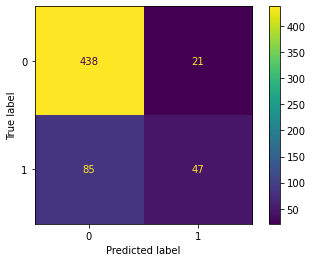

In [58]:
# Model Evaluation Using Confusion Matrix

cm_logreg = confusion_matrix (y_test, y_pred_test_logreg, labels = logreg.classes_)
disp_logreg = ConfusionMatrixDisplay (confusion_matrix = cm_logreg, display_labels = logreg.classes_)

disp_logreg.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 438 data yang benar diprediksi 0 dan terdapat 21 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 47 data yang benar diprediksi 1 dan terdapat 85 data yang salah diprediksi 1

In [59]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       459
           1       0.69      0.36      0.47       132

    accuracy                           0.82       591
   macro avg       0.76      0.66      0.68       591
weighted avg       0.80      0.82      0.80       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 84% dan recall 95% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 69% dan recall 36% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 82%

In [60]:
# Model Evaluation Using ROC-AUC

y_pred_proba_logreg = logreg.predict_proba(X_test_final)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
auc_logreg

0.7826879910213245

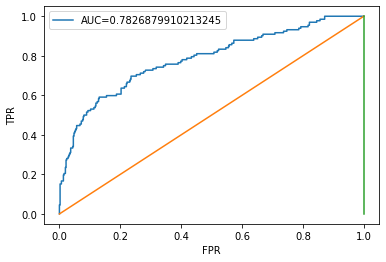

In [61]:
# Plot ROC-AUC 

plt.plot(fpr_logreg, tpr_logreg, label=f"AUC={auc_logreg}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.78 artinya luas daerah di bawah kurva sebesar 0.78, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 78%

## SVM (Suppor Vector Machine)

In [62]:
# Predict against Train-Set and Test-Set

y_pred_train_svm = svm.predict (X_train_final)
y_pred_test_svm = svm.predict (X_test_final)

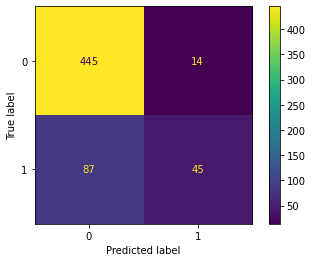

In [63]:
# Model Evaluation Using Confusion Matrix

cm_svm = confusion_matrix (y_test, y_pred_test_svm, labels = svm.classes_)
disp_svm = ConfusionMatrixDisplay (confusion_matrix = cm_svm, display_labels = svm.classes_)

disp_svm.plot()
plt.show()

Dari 459 aktual kelas 0, terdapat 445 data yang benar diprediksi 0 dan terdapat 14 data yang salah diprediksi 0

Dari 132 aktual kelas 1, terdapat 45 data yang benar diprediksi 1 dan terdapat 87 data yang salah diprediksi 1

In [64]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       459
           1       0.76      0.34      0.47       132

    accuracy                           0.83       591
   macro avg       0.80      0.66      0.68       591
weighted avg       0.82      0.83      0.80       591



Jumlah data aktual 0 sebanyak 459 data dengan precision sebesar 84% dan recall 97% pada saat memprediksi 0

Jumlah data aktual 1 sebanyak 132 data dengan precision sebesar 76% dan recall 34% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 83%

In [65]:
# Model Evaluation Using ROC-AUC

y_pred_proba_svm = svm.predict_proba(X_test_final)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
auc_svm

0.7368538324420677

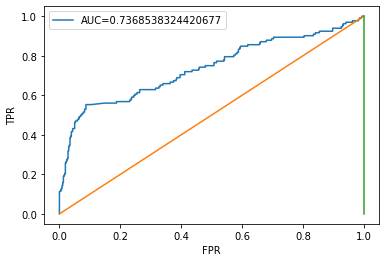

In [66]:
# Plot ROC-AUC 

plt.plot(fpr_svm, tpr_svm, label=f"AUC={auc_svm}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.73 artinya luas daerah di bawah kurva sebesar 0.73, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 73%

## Decision Tree

In [67]:
# Predict against Train-Set and Test-Set

y_pred_train_dectree = dectree.predict (X_train_final)
y_pred_test_dectree = dectree.predict (X_test_final)

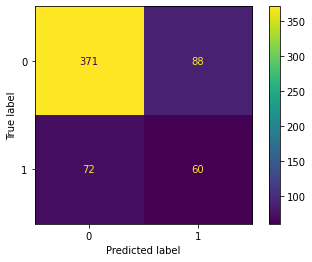

In [68]:
# Model Evaluation Using Confusion Matrix

cm_dectree = confusion_matrix (y_test, y_pred_test_dectree, labels = dectree.classes_)
disp_dectree = ConfusionMatrixDisplay (confusion_matrix = cm_dectree, display_labels = dectree.classes_)

disp_dectree.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 373 data yang benar diprediksi 0 dan terdapat 86 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 64 data yang benar diprediksi 1 dan terdapat 68 data yang salah diprediksi 1

In [69]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_dectree))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       459
           1       0.41      0.45      0.43       132

    accuracy                           0.73       591
   macro avg       0.62      0.63      0.63       591
weighted avg       0.74      0.73      0.73       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 85% dan recall 81% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 43% dan recall 48% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 74%

In [70]:
# Model Evaluation Using ROC-AUC

y_pred_proba_dectree = dectree.predict_proba(X_test_final)[:, 1]
fpr_dectree, tpr_dectree, _ = roc_curve(y_test, y_pred_proba_dectree)
auc_dectree = roc_auc_score(y_test, y_pred_proba_dectree)
auc_dectree

0.6308179837591602

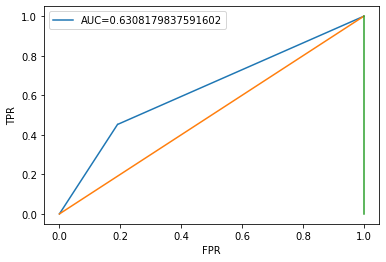

In [71]:
# Plot ROC-AUC 

plt.plot(fpr_dectree, tpr_dectree, label=f"AUC={auc_dectree}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.65 artinya luas daerah di bawah kurva sebesar 0.65, berarti model ini termasuk ke dalam kategori poor classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 65%

In [72]:
dectree.feature_importances_

array([0.10671244, 0.0305405 , 0.19413722, 0.01760596, 0.04445434,
       0.01416641, 0.0177687 , 0.02404073, 0.07168867, 0.091605  ,
       0.08774243, 0.08260329, 0.09534674, 0.09674908, 0.02483851])

Nilai ini merupakan nilai feature yang paling berpengaruh pada saat melakukan prediksi model

Contoh: 
-  0.1 merupakan nilai dari feature di kolom pertama yaitu kolom `limit_balance`,  
-  0.03 merupakan nilai dari feature kolom kedua yaitu kolom `education_level`, dst

## Random Forest

In [73]:
# Predict against Train-Set and Test-Set

y_pred_train_randf = randf.predict (X_train_final)
y_pred_test_randf = randf.predict (X_test_final)

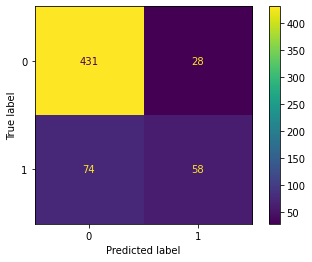

In [74]:
# Model Evaluation Using Confusion Matrix

cm_randf = confusion_matrix (y_test, y_pred_test_randf, labels = randf.classes_)
disp_randf = ConfusionMatrixDisplay (confusion_matrix = cm_randf, display_labels = randf.classes_)

disp_randf.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 431 data yang benar diprediksi 0 dan terdapat 28 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 57 data yang benar diprediksi 1 dan terdapat 75 data yang salah diprediksi 1

In [75]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_randf))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       459
           1       0.67      0.44      0.53       132

    accuracy                           0.83       591
   macro avg       0.76      0.69      0.71       591
weighted avg       0.81      0.83      0.81       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 85% dan recall 94% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 67% dan recall 43% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 83%

In [76]:
# Model Evaluation Using ROC-AUC

y_pred_proba_randf = randf.predict_proba(X_test_final)[:, 1]
fpr_randf, tpr_randf, _ = roc_curve(y_test, y_pred_proba_randf)
auc_randf = roc_auc_score(y_test, y_pred_proba_randf)
auc_randf

0.753383508285469

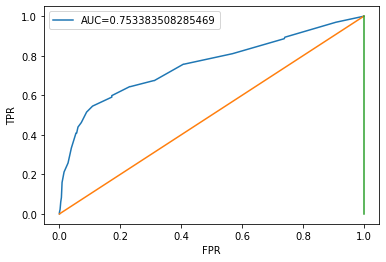

In [77]:
# Plot ROC-AUC 

plt.plot(fpr_randf, tpr_randf, label=f"AUC={auc_randf}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.74 artinya luas daerah di bawah kurva sebesar 0.74, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 74%

## KNN (K - Nearest Neighbors)

In [78]:
# Predict against Train-Set and Test-Set

y_pred_train_knn = knn.predict (X_train_final)
y_pred_test_knn = knn.predict (X_test_final)

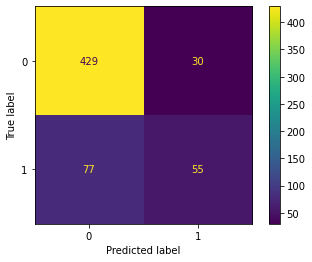

In [79]:
# Model Evaluation Using Confusion Matrix

cm_knn = confusion_matrix (y_test, y_pred_test_knn, labels = knn.classes_)
disp_knn = ConfusionMatrixDisplay (confusion_matrix = cm_knn, display_labels = knn.classes_)

disp_knn.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 429 data yang benar diprediksi 0 dan terdapat 30 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 55 data yang benar diprediksi 1 dan terdapat 77 data yang salah diprediksi 1

In [80]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       459
           1       0.65      0.42      0.51       132

    accuracy                           0.82       591
   macro avg       0.75      0.68      0.70       591
weighted avg       0.80      0.82      0.80       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 85% dan recall 93% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 65% dan recall 42% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 82%

In [81]:
# Model Evaluation Using ROC-AUC

y_pred_proba_knn = knn.predict_proba(X_test_final)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
auc_knn

0.7632617019871921

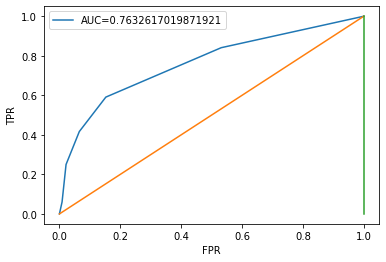

In [82]:
# Plot ROC-AUC 

plt.plot(fpr_knn, tpr_knn, label=f"AUC={auc_knn}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.76 artinya luas daerah di bawah kurva sebesar 0.76, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 76%

## Naive Bayes

In [83]:
# Predict against Train-Set and Test-Set

y_pred_train_nb = nb.predict (X_train_final)
y_pred_test_nb = nb.predict (X_test_final)

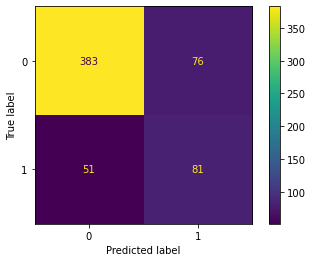

In [84]:
# Model Evaluation Using Confusion Matrix

cm_nb = confusion_matrix (y_test, y_pred_test_nb, labels = nb.classes_)
disp_nb = ConfusionMatrixDisplay (confusion_matrix = cm_nb, display_labels = nb.classes_)

disp_nb.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 383 data yang benar diprediksi 0 dan terdapat 76 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 81 data yang benar diprediksi 1 dan terdapat 51 data yang salah diprediksi 1

In [85]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       459
           1       0.52      0.61      0.56       132

    accuracy                           0.79       591
   macro avg       0.70      0.72      0.71       591
weighted avg       0.80      0.79      0.79       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 88% dan recall 83% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 52% dan recall 61% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 79%

In [86]:
# Model Evaluation Using ROC-AUC

y_pred_proba_nb = nb.predict_proba(X_test_final)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
auc_nb

0.7684029840892586

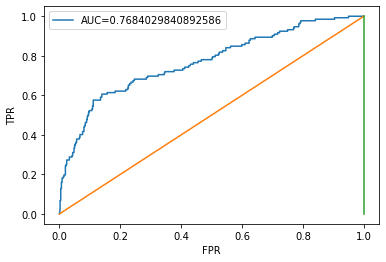

In [87]:
# Plot ROC-AUC 

plt.plot(fpr_nb, tpr_nb, label=f"AUC={auc_nb}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.76 artinya luas daerah di bawah kurva sebesar 0.76, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 76%

## Bagging Clasifier

In [88]:
# Predict against Train-Set and Test-Set

y_pred_train_bagclf = bagclf.predict (X_train_final)
y_pred_test_bagclf = bagclf.predict (X_test_final)

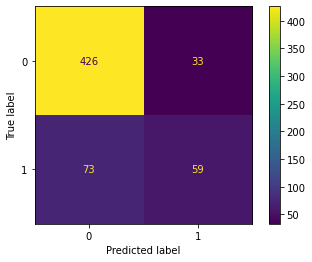

In [89]:
# Model Evaluation Using Confusion Matrix

cm_bagclf = confusion_matrix (y_test, y_pred_test_bagclf, labels = bagclf.classes_)
disp_bagclf = ConfusionMatrixDisplay (confusion_matrix = cm_bagclf, display_labels = bagclf.classes_)

disp_bagclf.plot()
plt.show()

Dari 459 data aktual kelas 0, terdapat 432 data yang benar diprediksi 0 dan terdapat 27 data yang salah diprediksi 0

Dari 132 data aktual kelas 1, terdapat 59 data yang benar diprediksi 1 dan terdapat 73 data yang salah diprediksi 1

In [90]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_bagclf))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       459
           1       0.64      0.45      0.53       132

    accuracy                           0.82       591
   macro avg       0.75      0.69      0.71       591
weighted avg       0.81      0.82      0.81       591



Jumlah data aktual kelas 0 sebanyak 459 data dengan precision sebesar 86% dan recall 94% pada saat memprediksi 0

Jumlah data aktual kelas 1 sebanyak 132 data dengan precision sebesar 69% dan recall 45% pada saat memprediksi 1

Secara keseluruhan ketepatan memprediksi data sebesar 83%

In [91]:
# Model Evaluation Using ROC-AUC

y_pred_proba_bagclf = bagclf.predict_proba(X_test_final)[:, 1]
fpr_bagclf, tpr_bagclf, _ = roc_curve(y_test, y_pred_proba_bagclf)
auc_bagclf = roc_auc_score(y_test, y_pred_proba_bagclf)
auc_bagclf

0.745675711361986

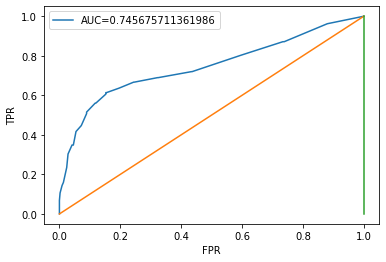

In [92]:
# Plot ROC-AUC 

plt.plot(fpr_bagclf, tpr_bagclf, label=f"AUC={auc_bagclf}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.75 artinya luas daerah di bawah kurva sebesar 0.75, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 75%

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [93]:
# Display Inference-Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,0,178262.0,177644.0,171997.0,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1,20000.0,2,1,2,25.0,0.0,0.0,0.0,-1.0,-1,-2,17693.0,13037.0,600.0,1040.0,0.0,0.0,1081.0,600.0,1040.0,800.0,0.0,0.0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,2,20234.0,20476.0,21991.0,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
3,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3,2,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1
4,260000.0,1,1,1,41.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,-1,2116.0,0.0,9781.0,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
7,20000.0,1,2,2,37.0,0.0,0.0,0.0,-2.0,-1,0,7440.0,15960.0,0.0,-1953.0,5985.0,6893.0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,0,47695.0,49550.0,51636.0,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
9,150000.0,2,3,2,52.0,0.0,0.0,-1.0,-1.0,-1,-1,5678.0,3608.0,694.0,-6.0,2266.0,1601.0,1010.0,696.0,0.0,2272.0,1605.0,3027.0,0


In [94]:
# Split between `X` (Features) and `y` (Target)

X_inf = data_inf[['limit_balance', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                     'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
y_inf = data_inf[['default_payment_next_month']]
X_inf

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,470000.0,1,1,0.0,0.0,0.0,0.0,0,0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0
1,20000.0,1,2,0.0,0.0,0.0,-1.0,-1,-2,1081.0,600.0,1040.0,800.0,0.0,0.0
2,30000.0,1,2,0.0,0.0,0.0,0.0,0,2,2000.0,3000.0,2000.0,2000.0,1000.0,0.0
3,10000.0,2,2,0.0,0.0,2.0,2.0,3,2,1800.0,500.0,1000.0,0.0,0.0,800.0
4,260000.0,1,1,-2.0,-2.0,-1.0,0.0,0,0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0
5,200000.0,1,2,-1.0,-1.0,-1.0,0.0,0,-1,0.0,9781.0,20000.0,20000.0,732.0,1005.0
6,230000.0,1,2,-1.0,-1.0,-1.0,-1.0,-1,-1,7662.0,2066.0,2007.0,2108.0,394.0,3214.0
7,20000.0,2,2,0.0,0.0,0.0,-2.0,-1,0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0
8,50000.0,1,1,0.0,0.0,0.0,0.0,0,0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0
9,150000.0,3,2,0.0,0.0,-1.0,-1.0,-1,-1,1010.0,696.0,0.0,2272.0,1605.0,3027.0


In [95]:
# Split between Numerical Columns and Categorical Columns

data_inf_num_skew = data_inf[['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
data_inf_num_normal = data_inf[['marital_status']]

In [96]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled_skew = scaler_mms.transform(data_inf_num_skew)
data_inf_num_scaled_normal = scaler_ss.transform(data_inf_num_normal)

In [97]:
# Concate the Columns

data_inf_final = np.concatenate([data_inf_num_skew, data_inf_num_normal], axis=1)

In [98]:
y_pred_inf = logreg.predict (data_inf_final)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
# Create Dataframe of Prediction-Set

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Default Pay - Prediction'])
y_pred_inf_df

,Default Pay - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [100]:
# Concate Between Inference-Set And Prediction-Set

pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Default Pay - Prediction
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,0,178262.0,177644.0,171997.0,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0,0
1,20000.0,2,1,2,25.0,0.0,0.0,0.0,-1.0,-1,-2,17693.0,13037.0,600.0,1040.0,0.0,0.0,1081.0,600.0,1040.0,800.0,0.0,0.0,0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,2,20234.0,20476.0,21991.0,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1,0
3,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3,2,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1,0
4,260000.0,1,1,1,41.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,-1,2116.0,0.0,9781.0,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0,0
7,20000.0,1,2,2,37.0,0.0,0.0,0.0,-2.0,-1,0,7440.0,15960.0,0.0,-1953.0,5985.0,6893.0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0,0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,0,47695.0,49550.0,51636.0,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0,0
9,150000.0,2,3,2,52.0,0.0,0.0,-1.0,-1.0,-1,-1,5678.0,3608.0,694.0,-6.0,2266.0,1601.0,1010.0,696.0,0.0,2272.0,1605.0,3027.0,0,0


## Predict Using Pipeline

In [101]:
# Display X_inf

X_inf

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,470000.0,1,1,0.0,0.0,0.0,0.0,0,0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0
1,20000.0,1,2,0.0,0.0,0.0,-1.0,-1,-2,1081.0,600.0,1040.0,800.0,0.0,0.0
2,30000.0,1,2,0.0,0.0,0.0,0.0,0,2,2000.0,3000.0,2000.0,2000.0,1000.0,0.0
3,10000.0,2,2,0.0,0.0,2.0,2.0,3,2,1800.0,500.0,1000.0,0.0,0.0,800.0
4,260000.0,1,1,-2.0,-2.0,-1.0,0.0,0,0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0
5,200000.0,1,2,-1.0,-1.0,-1.0,0.0,0,-1,0.0,9781.0,20000.0,20000.0,732.0,1005.0
6,230000.0,1,2,-1.0,-1.0,-1.0,-1.0,-1,-1,7662.0,2066.0,2007.0,2108.0,394.0,3214.0
7,20000.0,2,2,0.0,0.0,0.0,-2.0,-1,0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0
8,50000.0,1,1,0.0,0.0,0.0,0.0,0,0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0
9,150000.0,3,2,0.0,0.0,-1.0,-1.0,-1,-1,1010.0,696.0,0.0,2272.0,1605.0,3027.0


In [102]:
y_pred_inf_pipe = pipe.predict (X_inf)
y_pred_inf_pipe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [103]:
# Create Dataframe of Prediction-Set

y_pred_inf_df_pipe = pd.DataFrame(y_pred_inf_pipe, columns=['Default Pay - Prediction'])
y_pred_inf_df_pipe

,Default Pay - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [104]:
# Concate Between Inference-Set And Prediction-Set

pd.concat([data_inf, y_pred_inf_df_pipe], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Default Pay - Prediction
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,0,178262.0,177644.0,171997.0,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0,0
1,20000.0,2,1,2,25.0,0.0,0.0,0.0,-1.0,-1,-2,17693.0,13037.0,600.0,1040.0,0.0,0.0,1081.0,600.0,1040.0,800.0,0.0,0.0,0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,2,20234.0,20476.0,21991.0,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1,0
3,10000.0,2,2,2,46.0,0.0,0.0,2.0,2.0,3,2,2496.0,4245.0,4525.0,5450.0,5073.0,4843.0,1800.0,500.0,1000.0,0.0,0.0,800.0,1,0
4,260000.0,1,1,1,41.0,-2.0,-2.0,-1.0,0.0,0,0,1086.0,2853.0,38836.0,45087.0,47201.0,46199.0,3552.0,38836.0,20000.0,15000.0,15000.0,10000.0,0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,-1,2116.0,0.0,9781.0,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0,0
7,20000.0,1,2,2,37.0,0.0,0.0,0.0,-2.0,-1,0,7440.0,15960.0,0.0,-1953.0,5985.0,6893.0,10050.0,0.0,18047.0,7985.0,1000.0,2000.0,0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,0,47695.0,49550.0,51636.0,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0,0
9,150000.0,2,3,2,52.0,0.0,0.0,-1.0,-1.0,-1,-1,5678.0,3608.0,694.0,-6.0,2266.0,1601.0,1010.0,696.0,0.0,2272.0,1605.0,3027.0,0,0


# 10 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA

Ternyata orang yang berstatus married / sudah berkeluarga memiliki limit balance yang lebih besar dibandingkan dengan orang yang berstatus single / belum berkeluarga

Semakin jelas pendidikan seseorang, maka semakin besar limit balance yang diberikan

Jika Dilihat Dari `dafault_payment_next_month` Dapat Diketahui Bahwa Dataset Kita Imbalance Karena Perbandingannya Data 0 > 3x Dari Data 1 Atau Jika Dilihat Dari Data Keseluruhan Perbandingan Data 0 : Data 1 = 71% : 29%

2. Narasi based on Model Evaluation

Karena Data Imbalance, Maka Untuk Model Evaluation Lebih Baik Dilihat Dari Metrics ROC_AUC

Model Evaluation Kita Termasuk Ke Dalam Kategori Goodfit, Hal Ini Dapat Dilihat Dari Hasil score AUC adalah 0.78 artinya luas daerah di bawah kurva sebesar 0.78, berarti model ini sudah cukup bagus karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 78% 

3. Narasi based on Model Analysis

Jika kita terapkan model kita ke dalam data inference, klasifikasi yang diterapkan oleh model sudah cukup baik, dapat dilihat klasifikasi yang diterapkan model hanya berbeda 2 dari data inference yang kita ambil 

Dari 7 model yang kita pakai, yang memiliki kinerja paling baik adalah Logistic Regression dengan AUC score 0.78 yang artinya ketepatan model tersebut sebesar 78% dan model yang kurang baik adalah Decision Tree dengan AUC score 0.64 yang artinya ketepatan model tersebut sebesar 64%

Setelah dilakukan Cross Validation kinerja model Logistic Regression, meningkat menjadi 81% namun setelah dilakukan Grid Search untuk menentukan hyper parameter tidak terjadi kenaikan yang signifikan, kinerja model hanya meningkat 0,001%

4. Further Improvement

Mungkin agar lebih sempurna, pada model bisa lebih mengoptimalkan hyperparameter yang dipakai dengan mencoba dari trial and error menggunakan hyperparameter yang lain yang pengaplikasiannya lebih tepat pada dataset yang kita gunakan

## Conceptual Problem

Jawab Pertanyaan Berikut:

- Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

parameter untuk memisahkan atribut. Untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree. Dibawah ini adalah beberapa criteria yang dapat di pilih :

>  Information_gain : criteria ini menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk di pisah. Kriteria ini memiliki bias terhadap pemilihan atribut yang memiliki jumlah nilai yang besar.

> Gain_ratio : criteria ini melakukan penyesuaian informasi untuk setiap atribut untuk memungkinkan luas dan keseragaman atribut.

> Gini_index : criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan

> Akurasi : criteria ini memilih atribut yang akan dipisahkan yang dapat memaksimalkan akurasi seluruh tree.

> Least_square : criteria ini memilih atribut untuk dipecah, yang meminimalkan jarak kuadrat antara rata-rata nilai dalam node sehubungan dengan nilai sebenarnya

Sumber: 
https://sis.binus.ac.id/2022/02/17/mengenal-algoritma-decision-tree/

- Apakah fungsi dari pruning pada Tree model?

Untuk mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Ini karena Decision Tree yang dibuat bisa besar sehingga dapat disederhanakan dengan pemangkasan. Penanaman pohon dilakukan selain mengurangi ukuran pohon untuk juga mengurangi tingkat kesalahan prediksi dalam kasus-kasus baru.

Sumber:
https://adalah.co.id/decision-tree/#:~:text=Pemangkasan%20pohon%20(tree%20pruning)%20yaitu,nilai%20kepercayaan%20(level%20kepercayaan).

- Bagaimana cara memilih K yang optimal pada KNN?

Jika kelas berjumlah genap maka sebaiknya nilai K-nya ganjil, sebaliknya jika kelas berjumlah ganjil maka sebaiknya nilai K-nya genap

Contoh jika ada dua kelas (genap) A dan B, jika kita ambil nilai K genap juga misalnya 4, maka akan ada kemungkinan hasil 4 tetangga terdekat terdiri dari 2 kelas A dan 2 kelas B sehingga sama hasilnya, bisa A bisa B. Namun jika ambil nilai K ganjil, misal 3 atau 5, maka otomatis akan ada yang lebih banyak jumlahnya

- Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross Validation adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi

- Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score

> Accuracy adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data

> Precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif

> Recall adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif.

> F1 Score adalah rata - rata dari precision & recall